<a href="https://colab.research.google.com/github/anzardraboo/Computer-Vision/blob/master/RetinaNet(S).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load necessary modules

In [0]:
# !pip install numpy --user
!git clone https://github.com/fizyr/keras-retinanet.git

!python setup.py build_ext --inplace
!pip install --user git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI

!pip install . --user



Cloning into 'keras-retinanet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5334 (delta 0), reused 0 (delta 0), pack-reused 5329
Receiving objects: 100% (5334/5334), 13.30 MiB | 1.61 MiB/s, done.
Resolving deltas: 100% (3559/3559), done.
python3: can't open file 'setup.py': [Errno 2] No such file or directory
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-4q8o6u3l
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-4q8o6u3l
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=275238 sha256=b637b71f57265d75c094ec172c7f1c729e8be28d6d72ab1ab9cbbc69036c7b20
  Stored in directory: /tmp/pip-ephem-wheel-cache-k2atw4ji/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.

In [0]:
!pip install keras_retinanet

     |████████████████████████████████| 61kB 9.2MB/s 
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=156792 sha256=99329e9e35e84cca9bae3fa3def7c53281fd995c592f676365e71cc0264f3294
  Stored in directory: /root/.cache/pip/wheels/d9/a5/98/87f8ed08913b184bb625dde1c1277a4dfe969c77b377abde69
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20485 sha256=a317d342d54847436973c791e64d1101b17d6c39673287ca273abad33edb2963
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [0]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
# from keras_retinanet.utils.gpu import setup_gpu
from keras_retinanet import utils
# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# # use this to change which GPU to use
# gpu = 0

# # set the modified tf session as backend in keras
# setup_gpu(gpu)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
!git clone https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5

Cloning into 'resnet50_coco_best_v2.1.0.h5'...
remote: Not Found
fatal: repository 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5/' not found


## Load RetinaNet model

In [0]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here:https://github.com/fizyr/keras-retinanet/releases 
# model_path = os.path.join('..', 'snapshots', 'resnet50_coco_best_v2.1.0.h5')
# model_path = /content/resnet50_coco_best_v2.1.0.h5
# load retinanet model
model = models.load_model("/content/resnet50_coco_best_v2.1.0.h5", backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
# model = models.convert_model(model)

print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

Model: "retinanet-bbox"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
_____________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:310: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Run detection on example

processing time:  8.380112648010254


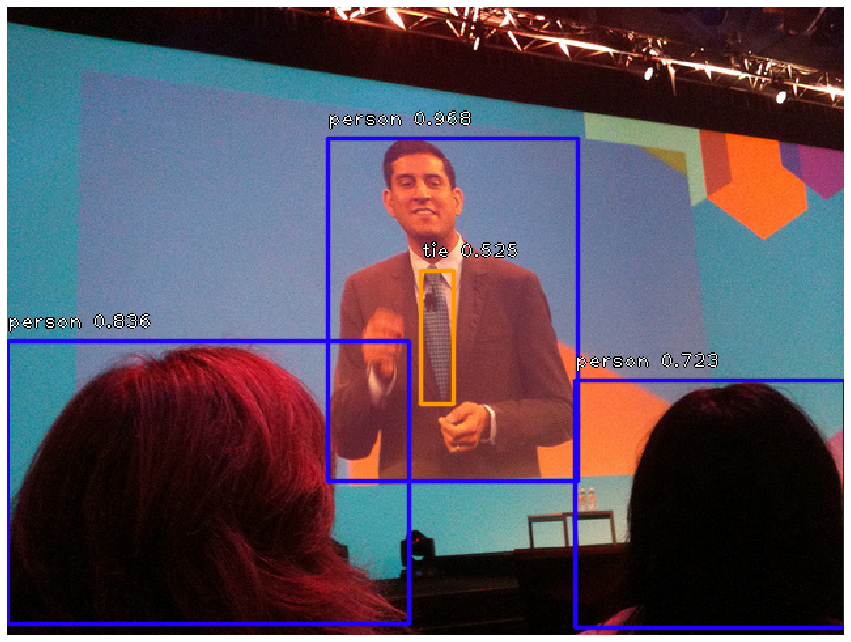

In [0]:
# load image
image = read_image_bgr('/content/keras-retinanet/examples/000000008021.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.5:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()